In [17]:
# author: René Kopeinig
# script: Pivot table visualization of cryptocurrency data
# description: Data aggregation and pivot table visualization of cryptocurrency data from Quandl

In [18]:
# Add IPython-specific directive to display plots directly below the notebook cell
%matplotlib inline

In [2]:
# Import dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Load BTC data 
btc = pd.read_csv('/home/rkopeinig/workspace/Time-Series-Analysis/data/btc.csv')
btc['date'] = pd.to_datetime(btc['date'])
btc = btc.set_index('date')

In [4]:
def create_pivot(df,value):
    df['year']= df.index.year
    df['month']= df.index.month
    return pd.pivot_table(df, values = value, columns = "year", index = "month")

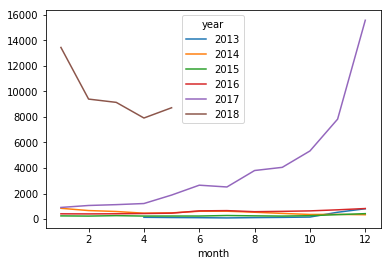

In [5]:
piv_btc=create_pivot(btc, 'price')
piv_btc.plot()
plt.show()

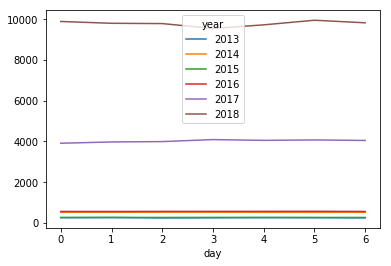

In [6]:
btc['day']= btc.index.dayofweek
btc['week']= btc.index.week
piv_btc_weekday = pd.pivot_table(btc, values = 'price', columns = "year", index = "day")
piv_btc_weekday.plot()
plt.show()

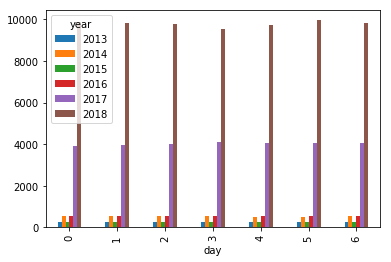

In [7]:
piv_btc_weekday.plot.bar();

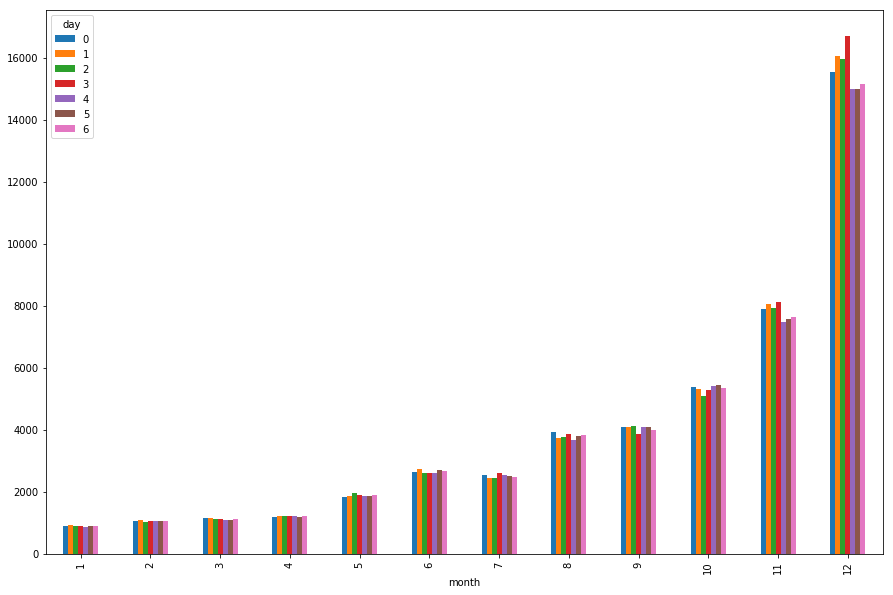

In [8]:
# Showing mean value of BTC for each month and each day of the week. 
piv_btc_year = pd.pivot_table(btc['2017'], values = 'price', columns = "day", index = "month")
piv_btc_year.plot.bar(figsize=(15,10));

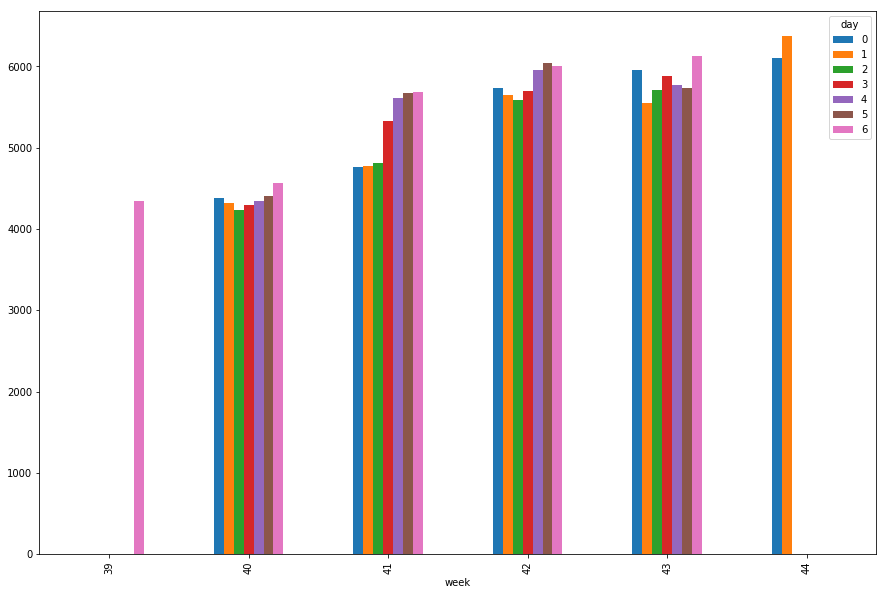

In [9]:
# Showing mean value of BTC for each day of each week in October 2017. 
piv_btc_month = pd.pivot_table(btc['2017-10'], values = 'price', columns = "day", index = "week")
piv_btc_month.plot.bar(figsize=(15,10));